In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('CreditScoring.csv')

## Data Cleaning

In [5]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [8]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

job_values = {
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

In [9]:
df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,1,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,1,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,2,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,1,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,1,fixed,46,107,0,0,310,910


In [11]:
#using describe() to get some summary statistics about the data set 
df.describe().round()

,seniority,time,age,records,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,1.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,0.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,1.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,1.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,1.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,2.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


Max values is 99999999.0 in some cases.  This is supspicous and and it is how missing values are encoded in this particular data set

In [12]:
for c in ['income', 'assets', 'debt']: 
    df[c] = df[c].replace(to_replace = 99999999, value = np.nan)

In [13]:
df.describe().round()

,seniority,time,age,records,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,1.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,0.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,1.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,1.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,1.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,2.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [14]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [15]:
#noticing that there is one record with a status of 'unk' 
#we create a new df without records of status unk
df = df[df['status'] != 'unk']

## Dataset Preparation
0. Split the data 
1. Handle missing values 
2. Use one-hot encond to encode categorical vars
3. Create the Feature Matrix X and target variable y

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state = 11)

In [18]:
#checking size of data sets
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [19]:
#The outcome we want to predict is status
#The positive class is default (i.e. y is 1 if the client defaulted and 0 if otherwise)
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [20]:
#remove target variables from training sets
del df_train['status']
del df_val['status']

In [21]:
#fill missing values with zeros
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

In [22]:
#list of dictionaries
dict_train = df_train.to_dict(orient = 'records')
dict_val = df_val.to_dict(orient = 'records')

In [23]:
from sklearn.feature_extraction import DictVectorizer

In [24]:
dv = DictVectorizer(sparse = False)

In [25]:
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

## Decision trees

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
y_pred = dt.predict_proba(X_train)[:,1]

In [30]:
roc_auc_score(y_train, y_pred)

1.0

In [31]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.6483404373834492

In [32]:
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [33]:
from sklearn.tree import export_text

In [34]:
tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- records <= 1.50
|   |--- job=parttime <= 0.50
|   |   |--- class: False
|   |--- job=parttime >  0.50
|   |   |--- class: True
|--- records >  1.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



In [35]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)

train auc 0.7054989859726213


In [36]:
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('validation auc', auc)

validation auc 0.6685264343319367


## Parameter tuning for decision tree


In [37]:
for depth in [1,2,3,4,5,6,10,15,20, None]:
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f'  % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.745
  10 -> 0.694
  15 -> 0.671
  20 -> 0.647
None -> 0.649


In [38]:
for m in [4,5,6]: 
    print('depth: %4s' % m)
    
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth = m, min_samples_leaf = s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%4s -> %.3f'  % (s, auc))
        
    print()

depth:    4
   1 -> 0.761
   5 -> 0.761
  10 -> 0.761
  15 -> 0.764
  20 -> 0.761
  50 -> 0.753
 100 -> 0.756
 200 -> 0.747

depth:    5
   1 -> 0.766
   5 -> 0.768
  10 -> 0.762
  15 -> 0.773
  20 -> 0.774
  50 -> 0.767
 100 -> 0.763
 200 -> 0.759

depth:    6
   1 -> 0.760
   5 -> 0.760
  10 -> 0.778
  15 -> 0.785
  20 -> 0.774
  50 -> 0.770
 100 -> 0.776
 200 -> 0.768



In [39]:
#our best parameters are max depth 6 and min leaf size 15
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## Random Forest

The idea here is that we train each tree on a a different subset of features and combine each models prediction into a majority vote. (i.e. ensemble method)

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=3)

In [41]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7778208326269647

In [42]:
aucs = []

for i in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    
    aucs.append(auc)
    

10 -> 0.778
20 -> 0.802
30 -> 0.808
40 -> 0.813
50 -> 0.815
60 -> 0.815
70 -> 0.813
80 -> 0.816
90 -> 0.817
100 -> 0.815
110 -> 0.816
120 -> 0.816
130 -> 0.818
140 -> 0.818
150 -> 0.819
160 -> 0.818
170 -> 0.818
180 -> 0.818
190 -> 0.818
200 -> 0.819


Text(0.5, 1.0, 'Number of trees vs. AUC')

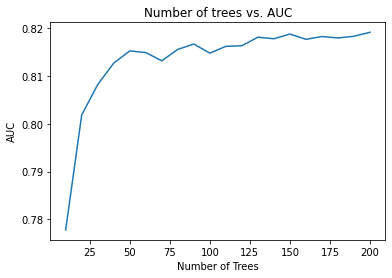

In [43]:
plt.plot(range(10,201, 10), aucs)
plt.xlabel("Number of Trees")
plt.ylabel("AUC")
plt.title("Number of trees vs. AUC")

## Parameter tuning the random forest

In [49]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []
    
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state = 1) 
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
        
    all_aucs[depth] = aucs
    print()
            

depth: 5
10 -> 0.800
20 -> 0.808
30 -> 0.810
40 -> 0.807
50 -> 0.808
60 -> 0.809
70 -> 0.810
80 -> 0.811
90 -> 0.809
100 -> 0.809
110 -> 0.809
120 -> 0.811
130 -> 0.811
140 -> 0.813
150 -> 0.813
160 -> 0.813
170 -> 0.813
180 -> 0.812
190 -> 0.813
200 -> 0.813

depth: 10
10 -> 0.794
20 -> 0.809
30 -> 0.810
40 -> 0.817
50 -> 0.818
60 -> 0.820
70 -> 0.820
80 -> 0.821
90 -> 0.821
100 -> 0.821
110 -> 0.822
120 -> 0.822
130 -> 0.822
140 -> 0.823
150 -> 0.823
160 -> 0.824
170 -> 0.825
180 -> 0.825
190 -> 0.826
200 -> 0.826

depth: 20
10 -> 0.789
20 -> 0.799
30 -> 0.808
40 -> 0.809
50 -> 0.811
60 -> 0.813
70 -> 0.818
80 -> 0.817
90 -> 0.819
100 -> 0.819
110 -> 0.820
120 -> 0.821
130 -> 0.821
140 -> 0.822
150 -> 0.823
160 -> 0.823
170 -> 0.823
180 -> 0.823
190 -> 0.824
200 -> 0.823



Text(0, 0.5, 'AUC')

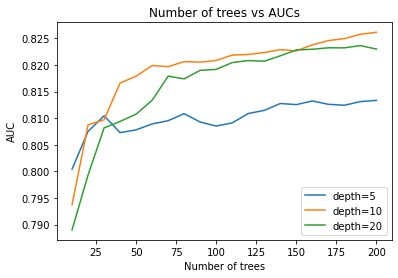

In [53]:
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.legend()
plt.title("Number of trees vs AUCs")
plt.xlabel("Number of trees")
plt.ylabel("AUC")


Our best depth is 10.  So with Max depth at 10, lets tune min samples in our 'leaves'

In [55]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_sample_leaf: %s' % m)
    aucs = []
    
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf = m, random_state = 1) 
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
        
    all_aucs[m] = aucs
    print()

min_sample_leaf: 3
10 -> 0.803
20 -> 0.816
30 -> 0.816
40 -> 0.818
50 -> 0.819
60 -> 0.819
70 -> 0.821
80 -> 0.822
90 -> 0.822
100 -> 0.823
110 -> 0.824
120 -> 0.824
130 -> 0.824
140 -> 0.826
150 -> 0.826
160 -> 0.826
170 -> 0.826
180 -> 0.827
190 -> 0.827
200 -> 0.827

min_sample_leaf: 5
10 -> 0.811
20 -> 0.818
30 -> 0.823
40 -> 0.823
50 -> 0.825
60 -> 0.826
70 -> 0.826
80 -> 0.826
90 -> 0.825
100 -> 0.825
110 -> 0.825
120 -> 0.825
130 -> 0.824
140 -> 0.825
150 -> 0.825
160 -> 0.825
170 -> 0.826
180 -> 0.825
190 -> 0.825
200 -> 0.825

min_sample_leaf: 10
10 -> 0.816
20 -> 0.819
30 -> 0.821
40 -> 0.819
50 -> 0.819
60 -> 0.819
70 -> 0.820
80 -> 0.821
90 -> 0.820
100 -> 0.820
110 -> 0.822
120 -> 0.823
130 -> 0.823
140 -> 0.823
150 -> 0.823
160 -> 0.824
170 -> 0.824
180 -> 0.825
190 -> 0.824
200 -> 0.824



Text(0, 0.5, 'AUC')

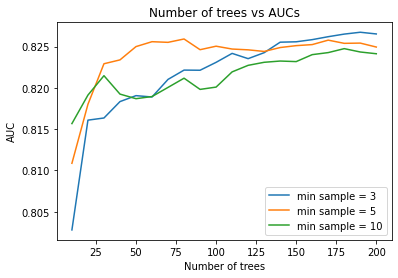

In [56]:
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucs[3], label='min sample = 3')
plt.plot(num_trees, all_aucs[5], label='min sample = 5')
plt.plot(num_trees, all_aucs[10], label='min sample = 10')
plt.legend()
plt.title("Number of trees vs AUCs")
plt.xlabel("Number of trees")
plt.ylabel("AUC")


The best performance came at depth 10 and sample 3

In [57]:
#select our model 
rf = RandomForestClassifier(n_estimators = 200, max_depth = 10, min_samples_leaf= 3, random_state=1)

## XGBoost: Extreme gradient boosting